In [1]:
import uproot
import awkward
from awkward import JaggedArray
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from math import log,exp
from numpy import ma

In [ ]:
import awkward1 as ak

In [2]:
from PlotDiHadKins import *

Welcome to JupyROOT 6.20/04


In [ ]:
smearedEvents=loadRootFile("dataFiles/pythia1M_10_100_wChrisPlugin_noSM.root")

In [ ]:
unsmearedEvents=loadRootFile("dataFiles/pythia1M_10_100_wChrisPlugin_smeared.root")

In [3]:
smearedEventsA=loadRootFileArray("dataFiles/pythia1M_10_100_wChrisPlugin_noSM.root")
unsmearedEventsA=loadRootFileArray("dataFiles/pythia1M_10_100_wChrisPlugin_smeared.root")

In [ ]:
plotXVsQ2(smearedEventsA)

In [6]:
 data=smearedEventsA

Text(0, 0.5, '$Q^2$')

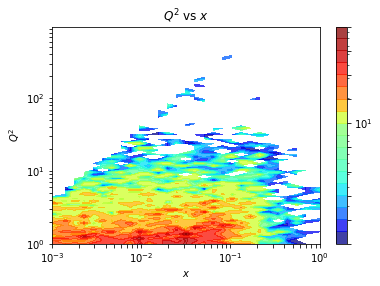

In [28]:
xEdges=np.logspace(-3,0,30) 
q2Edges=np.logspace(0,3,100)

arQ2=data["Q2"]
arX=data["x"]

hist2d=np.histogram2d(arQ2[arQ2[:]>1.0],arX[arQ2[:]>1.0],bins=(q2Edges,xEdges))
#should be done better, namely at mean of log
xMean=[exp((log(xEdges[i])-log(xEdges[i-1]))/2+log(xEdges[i-1]))  for i in range(len(xEdges)) if(i>0)]
q2Mean=[exp((log(q2Edges[i])-log(q2Edges[i-1]))/2+log(q2Edges[i-1]))  for i in range(len(q2Edges)) if(i>0)]
#don't cut off half of the upper and lower bins
xMean[0]=xEdges[0]
xMean[-1]=xEdges[-1]
q2Mean[0]=q2Edges[0]
#  q2Mean[-1]=q2Edges[-1]
 
fig, ax=plt.subplots(1,1)
#histogram returns histogram plus axes...
z=ma.masked_where(hist2d[0] <= 0, hist2d[0])
cf=plt.contourf(xMean, q2Mean, z, alpha=.75, cmap='jet',locator=ticker.LogLocator(numticks=20,subs=range(1,10)))
#  cf=plt.contourf(etaMean, np.log10(xMean), z, 8, alpha=.75, cmap='jet',locator=ticker.LogLocator())
ax.set_yscale("log")
ax.yaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=30))
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=30))
#  C = plt.contour(etaMean,xMean, z, 8, colors='black', linewidth=.5)
fig.colorbar(cf)
ax.set_title("$Q^2$ vs $x$")
plt.xlabel('$x$')
plt.ylabel('$Q^2$')

In [24]:
len(arQ2[arQ2[:]>0])

1191723

In [ ]:
z

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))

Text(0, 0.5, '$Q^2$')

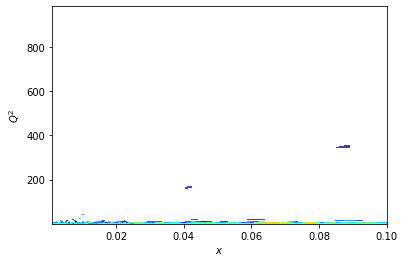

In [ ]:
fig, ax=plt.subplots(1,1)
#histogram returns histogram plus axes...
z=ma.masked_where(hist2d[0] <= 0, hist2d[0])
lev_exp = np.arange(np.floor(np.log10(z.min())-1),
                np.ceil(np.log10(z.max())+1))
levs = np.power(10, lev_exp)
cf=plt.contourf(xMean, q2Mean, z, alpha=.75, cmap='jet',locator=ticker.LogLocator(numticks=20,subs=range(1,10)))
#  cf=plt.contourf(etaMean, np.log10(xMean), z, 8, alpha=.75, cmap='jet',locator=ticker.LogLocator())
ax.set_yscale("log")
ax.yaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=30))
ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(subs=range(1,10)))
ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=30))
#  C = plt.contour(etaMean,xMean, z, 8, colors='black', linewidth=.5)
fig.colorbar(cf)
ax.set_title("$Q^2$ vs $x$")
plt.xlabel('$x$')
plt.ylabel('$Q^2$')

In [ ]:
smearedEvents.items()

In [ ]:
smearedEvents["hadPt"][:,0]

In [ ]:
arrays = {name: ak.from_awkward0(array) for name, array in smearedEventsA.items()}
arraysTruth = {name: ak.from_awkward0(array) for name, array in unsmearedEventsA.items()}

In [ ]:
arrays

In [ ]:
events=ak.zip({"evnum":arrays["evnum"], "true":ak.zip({"x": arraysTruth["x"],"y": arraysTruth["y"],"Q2": arraysTruth["Q2"],"pair":ak.zip({"Z": arraysTruth["Z"],"hadP": arraysTruth["hadP"],
                                                                               "hadPt": arraysTruth["hadPt"],
                                                           "hadEta": arraysTruth["hadEta"],"hadPhi": arraysTruth["hadPhi"]},depthlimit=1),
                                                            "PhPerp": arraysTruth["PhPerp"],"PhEta": arraysTruth["PhEta"],"PhPhi": arraysTruth["PhPhi"],"Ph": arraysTruth["Ph"]},depthlimit=1),
                   "rec": ak.zip({"x": arrays["x"],"y": arrays["y"],"Q2": arrays["Q2"],"PhPerp": arrays["PhPerp"],"PhEta": arrays["PhEta"],"PhPhi": arrays["PhPhi"],"Ph": arrays["Ph"],
                                              "pair":ak.zip({"Z": arrays["Z"],"hadP": arrays["hadP"],
                                                            "hadPt": arrays["hadPt"],
                                                           "hadEta": arrays["hadEta"],"hadPhi": arrays["hadPhi"]},depthlimit=1)},depthlimit=1)})

In [ ]:
events.true.pair[0].hadEta[0]

In [ ]:
trueEv=ak.JaggedArray.fromiter(arraysTruth["evnum"])

In [ ]:
type(trueEv)

In [ ]:
import mplhep as hep


In [ ]:
events2=ak.JaggedArray.zip({"evnum":trueEv, "true":ak.JaggedArray.zip({"x": arraysTruth["x"],"y": arraysTruth["y"],"Q2": arraysTruth["Q2"]},depthlimit=1)},depthlimit=1)

In [ ]:
resInM(unsmearedEvents,smearedEvents)

In [ ]:
plotXVsEtaPt(smearedEventsA)

In [ ]:

xEdges=[10**(-3+i/3) for i in range(8)]

In [ ]:
data=smearedEvents
xEdges=np.logspace(-3,-1,7)
etaEdges=[-3+i for i in range(6)]
    #this stores the eta for each hadron in the pair, so we have to flatten this structure
arEta=data["hadEta"]
arEta=arEta.flatten();
    #get x for the other dimension, now of course we have only have as many x values
arX=data["x"]
arX=np.repeat(arX,2)
hist2d=np.histogram2d(arX,arEta,bins=(xEdges,etaEdges))
#should be done better, namely at mean of log
xMean=[exp((log(xEdges[i])-log(xEdges[i-1]))/2+log(xEdges[i-1]))  for i in range(len(xEdges)) if(i>0)]
etaMean=[(etaEdges[i]-etaEdges[i-1])/2+etaEdges[i-1]  for i in range(len(etaEdges)) if(i>0)]

In [ ]:
hist2d

In [ ]:
fig, ax=plt.subplots(1,1)
#histogram returns histogram plus axes...
z= ma.masked_where(hist2d[0] <= 0, hist2d[0])

In [ ]:
np.log10(xMean)

In [ ]:
cf=plt.contourf(etaMean, np.log10(xMean), z, 8, alpha=.75, cmap='jet',locator=ticker.LogLocator())
ax.set_yscale("log")
fig.colorbar(cf)
ax.set_title("$\eta$ vs $x$")

In [ ]:
cf=plt.contourf(etaMean, np.log10(xMean), z, 8, alpha=.75, cmap='jet',locator=ticker.LogLocator())

In [ ]:
cf

In [ ]:
data=smearedEvents

In [ ]:
xEdges=[];
xEdges.append(0.001)
xEdges.append(0.02)
xEdges.append(0.05)
xEdges.append(0.1)
xEdges.append(0.8)
    #xEdgesHigh=xEdgesLow[1:]
etaEdges=[-3+i for i in range(6)]

    #this stores the eta for each hadron in the pair, so we have to flatten this structure
arEta=data["hadEta"]
arEta.flatten();
    #get x for the other dimension, now of course we have only have as many x values
arX=data["x"]
np.repeat(arX,2)

In [ ]:
np.histogram2d(arX,arEta,bins=(xEdges,etaEdges))

In [ ]:
ar.to_matrix()


In [ ]:
ar.as_matrix()

In [ ]:
ar1=np.arange(10)

In [ ]:
ar2=np.arange(10)

In [ ]:
ar3=np.arange(10,10)

In [ ]:
np.histogram2d(ar1,ar2,4)

In [ ]:
np.asarray(ar)

In [ ]:
ar

In [ ]:
arx=smearedEvents["x"]

In [ ]:
arx

In [ ]:
arEta=smearedEvents["hadEta"]

In [ ]:
arEta

In [ ]:
#awkward regular gives regular array, flatten hopefully flattens

In [ ]:
arEta.regular()

In [ ]:
arEta.flatten()

In [ ]:
np.repeat([1,2,3],2)

In [ ]:
arx.repeat(2)

In [ ]:
np.repeat(arx,2)

In [ ]:
xEdges=[];
xEdges.append(0.001)
xEdges.append(0.02)
xEdges.append(0.05)
xEdges.append(0.1)
xEdges.append(0.8)
#xEdgesHigh=xEdgesLow[1:]


In [ ]:
etaEdges=[-3+i for i in range(6)]

    #this stores the eta for each hadron in the pair, so we have to flatten this structure
arEta=smearedEvents["hadEta"]
arEta=arEta.flatten();
    #get x for the other dimension, now of course we have only have as many x values
arX=smearedEvents["x"]
arX=np.repeat(arX,2)

In [ ]:
arX2

In [ ]:
arEta=arEta.flatten()

In [ ]:
hist2d=np.histogram2d(arX,arEta,bins=(xEdges,etaEdges))

In [ ]:
len(arEta)

In [ ]:
for i in range(len(xEdges)) if(i>0):
    print(i)
    

In [ ]:
xMean=[(xEdges[i]-xEdges[i-1])/2+xEdges[i-1]  for i in range(len(xEdges)) if(i>0)]
etaMean=[(etaEdges[i]-etaEdges[i-1])/2+etaEdges[i-1]  for i in range(len(etaEdges)) if(i>0)]

In [ ]:
etaMean

In [ ]:
plt.contourf(etaMean, xMean, hist2d[0], 8, alpha=.75, cmap='jet')

In [ ]:
hist2d

In [ ]:
plt.imshow(hist2d[0])

In [ ]:
math.log(0.1)

In [ ]:
Math.log(0.1)

In [ ]:
import log from Math

In [ ]:
import log from math

In [ ]:
from math import log

In [ ]:
log(0.1)

In [ ]:
log(0.01)-log(0.1)

In [ ]:
log(0.01)

In [ ]:
log(0.1)

In [ ]:
log(0.01) - log(0.1)

In [ ]:
e=((log(0.1) - log(0.01))/2+log(0.01))

In [ ]:
from math import exp

In [ ]:
exp(e)


In [ ]:
from math import log, exp

In [ ]:
xMean=[exp((log(xEdges[i])-log(xEdges[i-1]))/2+log(xEdges[i-1]))  for i in range(len(xEdges)) if(i>0)]

In [ ]:
xMean